In [1]:
import pandas as pd 
df = pd.read_csv('diabetes2.csv')


In [2]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.duplicated().sum()

0

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
###df['Age'].value_counts()

In [8]:
df1 = df.copy()

In [9]:
df['Outcome'] = df['Outcome'].replace([0,1],['No','Yes'])

In [10]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Yes
1,1,85,66,29,0,26.6,0.351,31,No
2,8,183,64,0,0,23.3,0.672,32,Yes
3,1,89,66,23,94,28.1,0.167,21,No
4,0,137,40,35,168,43.1,2.288,33,Yes
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,No
764,2,122,70,27,0,36.8,0.340,27,No
765,5,121,72,23,112,26.2,0.245,30,No
766,1,126,60,0,0,30.1,0.349,47,Yes


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

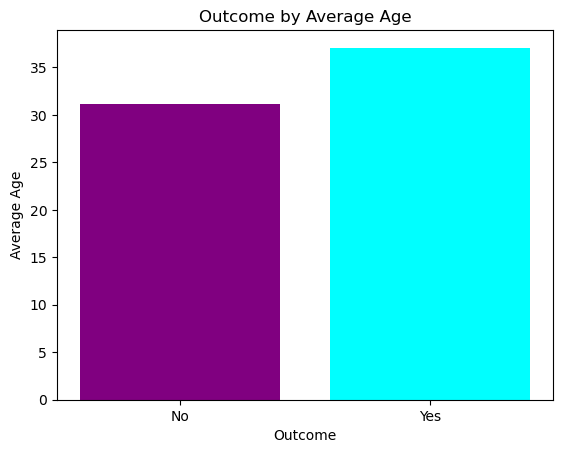

In [12]:
grouped_data = df.groupby('Outcome')['Age'].mean().reset_index()

# Defining a list of colors (you can customize this list)
colors = ['purple', 'cyan']

# Plotting the bar chart
plt.bar(grouped_data['Outcome'], grouped_data['Age'], color=colors[:len(grouped_data)])

# Adding labels and title
plt.xlabel('Outcome')
plt.ylabel('Average Age')
plt.title('Outcome by Average Age')

# Display the plot
plt.show()

In [13]:
import numpy as np


In [14]:
##
##df['Age'].value_counts()

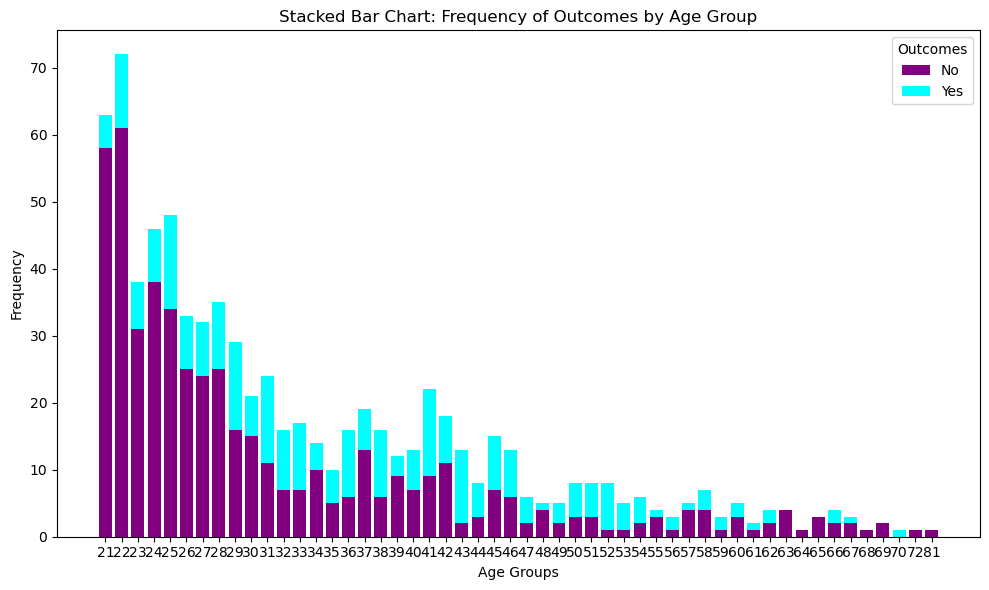

In [15]:
# Assuming df is a pandas DataFrame with 'outcome' and 'age' columns
# Grouping data by 'age' and 'outcome', and counting the frequency of each outcome for each age group
grouped_data = df.groupby(['Age', 'Outcome']).size().unstack().fillna(0)

# Creating an array of colors for the bars
colors = ['purple', 'cyan']

# Creating positions for the bars on the x-axis
x = np.arange(len(grouped_data.index))  # Label locations (number of age groups)

# Plotting the bars
fig, ax = plt.subplots(figsize=(10, 6))

# Initializing the bottom positions for the stacks
bottom = np.zeros(len(grouped_data.index))

# Loop through each outcome to create a stacked bar for each age group
for i, Outcome in enumerate(grouped_data.columns):
    ax.bar(x, grouped_data[Outcome], label=str(Outcome), color=colors[i % len(colors)], bottom=bottom)
    # Update the bottom position for the next stack
    bottom += grouped_data[Outcome]

# Adding labels, title, and custom x-axis ticks
ax.set_xlabel('Age Groups')
ax.set_ylabel('Frequency')
ax.set_title('Stacked Bar Chart: Frequency of Outcomes by Age Group')
ax.set_xticks(x)
ax.set_xticklabels(grouped_data.index)
ax.legend(title="Outcomes")

# Display the plot
plt.tight_layout()
plt.show()

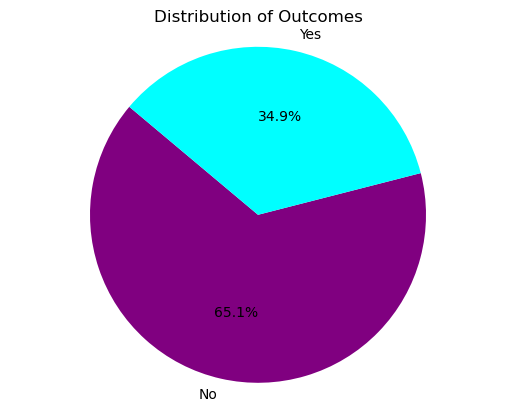

In [16]:


grouped_data = df.groupby('Outcome').size().reset_index(name='count')

# Defining a list of colors (customize this list as needed)
colors = ['purple', 'cyan']

# Plotting the pie chart
plt.pie(grouped_data['count'], labels=grouped_data['Outcome'], colors=colors[:len(grouped_data)],
        autopct='%1.1f%%', startangle=140)

# Adding a title
plt.title('Distribution of Outcomes')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the plot
plt.show()

In [17]:
df['Outcome'] = df['Outcome'].replace(['No','Yes'],[0,1])

In [18]:
df['Age'].max()

81

In [19]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [21]:
##df['Glucose'] = sc.fit_transform(df['Glucose'].values.reshape(-1,1))

In [22]:
##df['Insulin'] = sc.fit_transform(df['Insulin'].values.reshape(-1,1))

In [23]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [24]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [25]:
from sklearn.preprocessing import OneHotEncoder
ONE = OneHotEncoder()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
X = df.drop('Outcome', axis = 1) # X here represents our features(independent variable)
y = df['Outcome'] # y here represents our labels(Dependent Variable)
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.20, random_state = 30)

In [28]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
352,3,61,82,28,0,34.4,0.243,46
129,0,105,84,0,0,27.9,0.741,62
387,8,105,100,36,0,43.3,0.239,45
244,2,146,76,35,194,38.2,0.329,29
366,6,124,72,0,0,27.6,0.368,29
...,...,...,...,...,...,...,...,...
145,0,102,75,23,0,0.0,0.572,21
763,10,101,76,48,180,32.9,0.171,63
140,3,128,78,0,0,21.1,0.268,55
500,2,117,90,19,71,25.2,0.313,21


In [29]:
df['Insulin'].min()

0

In [30]:
y_train

352    0
129    1
387    1
244    0
366    1
      ..
145    0
763    0
140    0
500    0
421    0
Name: Outcome, Length: 614, dtype: int64

In [31]:
lr = LogisticRegression()

In [32]:
lr.fit(X_train,y_train)

C:\Users\udeji\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
y_pred = lr.predict(X_test)

In [34]:
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
      dtype=int64)

In [35]:
y_test

226    0
610    0
505    0
470    0
474    0
      ..
245    1
486    0
533    0
220    1
106    0
Name: Outcome, Length: 154, dtype: int64

In [36]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7857142857142857
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       104
           1       0.68      0.64      0.66        50

    accuracy                           0.79       154
   macro avg       0.76      0.75      0.75       154
weighted avg       0.78      0.79      0.78       154

Confusion Matrix:
[[89 15]
 [18 32]]


In [37]:
confusion_matrix(y_test,y_pred)

array([[89, 15],
       [18, 32]], dtype=int64)

In [38]:
from sklearn.metrics._plot.confusion_matrix import unique_labels

In [39]:
def plot1(Y_true,y_pred):
    labels = unique_labels(y_test)

    column = [f'predicted{label}' for label in labels]
    indices = [f'Actual{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(Y_true,y_pred),columns = column, index = indices)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

### CONFUSION MATRIX

<Axes: >

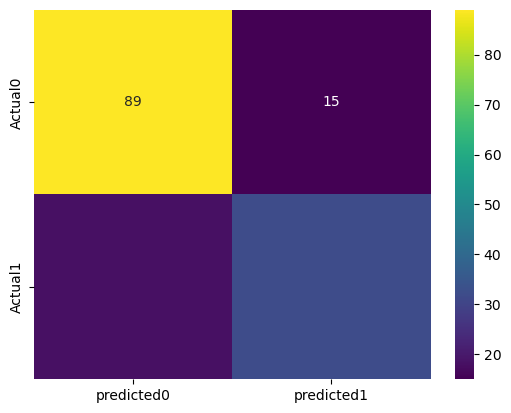

In [40]:
plot1(y_test,y_pred)

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dtc = DecisionTreeClassifier(criterion ='gini',max_depth=None,min_samples_split=2,random_state = 25,splitter='best',class_weight=None)

In [43]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=25)

In [44]:
y_pred2 = dtc.predict(X_test)

In [45]:
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred2))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred2))

Accuracy: 0.7077922077922078
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       104
           1       0.55      0.52      0.54        50

    accuracy                           0.71       154
   macro avg       0.66      0.66      0.66       154
weighted avg       0.70      0.71      0.71       154

Confusion Matrix:
[[83 21]
 [24 26]]


In [46]:
confusion_matrix(y_test,y_pred2)

array([[83, 21],
       [24, 26]], dtype=int64)

In [47]:
def plot2(Y_true,y_pred2):
    labels = unique_labels(y_test)

    column = [f'predicted{label}' for label in labels]
    indices = [f'Actual{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(Y_true,y_pred2),columns = column, index = indices)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

<Axes: >

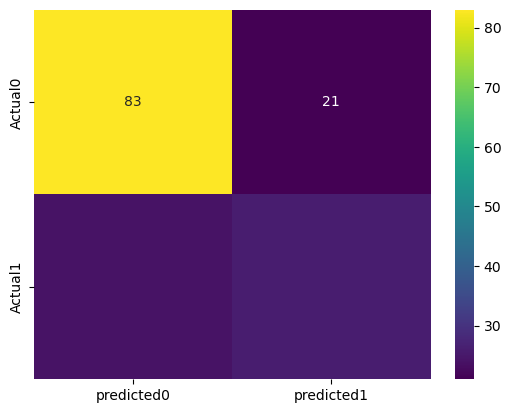

In [48]:
plot2(y_test,y_pred2)

In [49]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn = KNeighborsClassifier(n_neighbors=5,algorithm='auto',weights='uniform',p=2,n_jobs=None)

In [51]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [52]:
y_pred3 = knn.predict(X_test)

In [53]:
y_pred3

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0],
      dtype=int64)

In [54]:
accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred3))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred3))

Accuracy: 0.7402597402597403
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.81       104
           1       0.62      0.52      0.57        50

    accuracy                           0.74       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.73      0.74      0.73       154

Confusion Matrix:
[[88 16]
 [24 26]]


In [55]:
confusion_matrix(y_test,y_pred3)

array([[88, 16],
       [24, 26]], dtype=int64)

In [56]:
def plot3(Y_true,y_pred3):
    labels = unique_labels(y_test)

    column = [f'predicted{label}' for label in labels]
    indices = [f'Actual{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(Y_true,y_pred3),columns = column, index = indices)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

<Axes: >

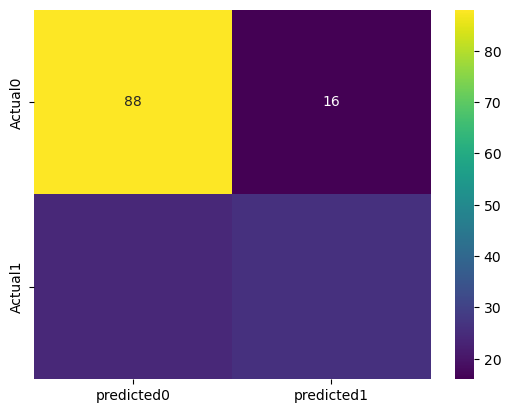

In [57]:
plot3(y_test,y_pred3)

In [58]:
from sklearn.naive_bayes import GaussianNB

In [59]:
gnb = GaussianNB(priors=None, var_smoothing=1e-9)

In [60]:
gnb.fit(X_train, y_train)

GaussianNB()

In [61]:
y_pred4 = gnb.predict(X_test)

In [62]:
accuracy = accuracy_score(y_test, y_pred4)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred4))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred4))


Accuracy: 0.7792207792207793
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       104
           1       0.69      0.58      0.63        50

    accuracy                           0.78       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.77      0.78      0.77       154

Confusion Matrix:
[[91 13]
 [21 29]]


In [63]:
confusion_matrix(y_test,y_pred4)

array([[91, 13],
       [21, 29]], dtype=int64)

In [64]:
def plot4(Y_true,y_pred4):
    labels = unique_labels(y_test)
    column = [f'predicted{label}' for label in labels]
    indices = [f'Actual{label}' for label in labels]
    
    table = pd.DataFrame(confusion_matrix(Y_true,y_pred4),columns = column, index = indices)

    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

<Axes: >

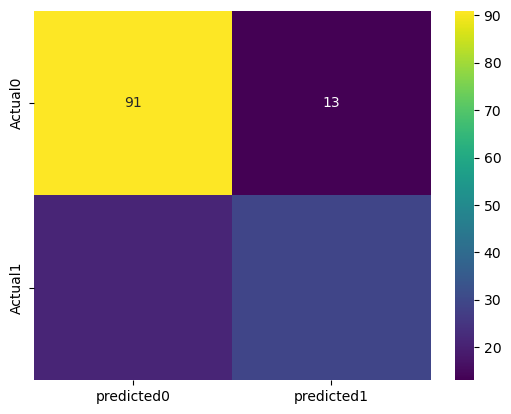

In [65]:
plot4(y_test,y_pred4)

In [66]:
from sklearn.svm import SVC


In [67]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]  # Applicable only for 'poly' kernel
}

In [68]:
svm = SVC()

In [69]:
svm.fit(X_train, y_train)

SVC()

In [70]:
y_pred5 = svm.predict(X_test)

In [71]:
accuracy = accuracy_score(y_test, y_pred5)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred5))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred5))


Accuracy: 0.7987012987012987
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       104
           1       0.73      0.60      0.66        50

    accuracy                           0.80       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.79      0.80      0.79       154

Confusion Matrix:
[[93 11]
 [20 30]]


In [72]:
confusion_matrix(y_test,y_pred5)

array([[93, 11],
       [20, 30]], dtype=int64)

In [73]:
def plot5(Y_true,y_pred5):
    labels = unique_labels(y_test)

    column = [f'predicted{label}' for label in labels]
    indices = [f'Actual{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(Y_true,y_pred5),columns = column, index = indices)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

<Axes: >

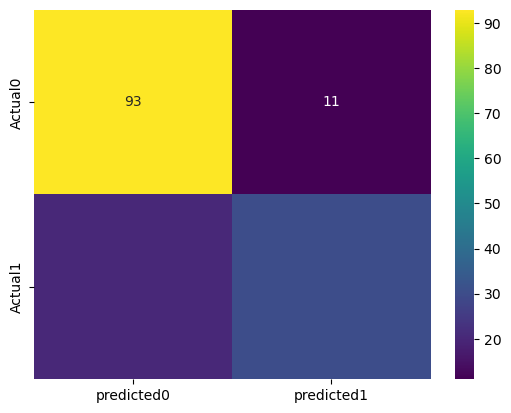

In [74]:
plot5(y_test,y_pred5)

In [154]:
import joblib
joblib.dump(lr,'Diabetes_Logistic.model')

['Diabetes_Logistic.model']